# Dependencies

In [1]:
# Dependencies to Visualize the model
%matplotlib inline
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)

In [2]:
# Filepaths, numpy, and Tensorflow
import os
import numpy as np
import tensorflow as tf

In [3]:
# Sklearn scaling
from sklearn.preprocessing import MinMaxScaler

## keras Specific Dependencies

In [4]:
# Keras
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist

# Loading and Preprocssing Data

## Load the MNIST Handwriting Dataset from Keras

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Training Data Info")
print("Training Data Shape:", X_train.shape)
print("Training Data Labels Shape:", y_train.shape)

Training Data Info
Training Data Shape: (60000, 28, 28)
Training Data Labels Shape: (60000,)


In [6]:
## Plot the first digit

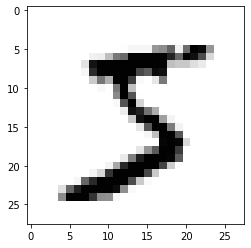

In [7]:
# Plot the first image from the dataset
plt.imshow(X_train[0,:,:], cmap=plt.cm.Greys)

## Each Image is a 28x28 Pixel greyscale image with values from 0 to 255

In [8]:
# Our image is an array of pixels ranging from 0 to 255
X_train[0, :, :]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### For training a model, we want to flattern the data into rows os 1D image arrays

In [9]:
# We want to flatten our image of 28x28 pixels to a 1D array of 784 pixels
ndims = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], ndims)
X_test = X_test.reshape(X_test.shape[0], ndims)
print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (60000, 784)
Testing Shape: (10000, 784)


## Scaling and Normaliztion
- Use Sklearn MinMaxscaler to normalize the data between 0 an 1

In [10]:
# Next, we normalize our training data to be between 0 and 1
scaler = MinMaxScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## One-Hot Encoding
We need to one-hot encode our integer labels using the to_categorical helper function

In [11]:
# the Training and Testing labels are integer encoded from 0 to 9
y_train[:20]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7, 2, 8, 6, 9],
      dtype=uint8)

In [12]:
# We need to convert our target labels (expected values) to categorical data
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Original label of `5` is one-hot encoded as `0000010000`
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Building our Model
In this example, we are going to build a Deep Multi-Layer Perceptron model with 2 hidden layers.

In [13]:
# Create an empty sequential model
model = Sequential()

In [14]:
# Add the first layer where the input dimensions are the 784 pixel values
# We can also choose our activation function. `relu` is a common
model.add(Dense(100, activation='relu', input_dim=X_train.shape[1]))

In [15]:
# Add a second hidden layer
# A dense layer is when every node from the previous layer is connected to each node in the current layer.
model.add(Dense(100, activation='relu'))

In [16]:
# Add our final output layer where the number of nodes 
# corresponds to the number of y labels
model.add(Dense(num_classes, activation='softmax'))

## Model Summary

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


## Compile and Train our Model
Now that we have our model architecture defined, we must compile the model using a loss function and optimizer. We can also specify additional training metrics such as accuracy.

In [18]:
# Use categorical crossentropy for categorical data and mean squared error for regression
# Hint: your output layer in this example is using software for logistic regression (categorical)
# If your output layer activation was `linear` then you may want to use `mse` for loss
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

## Finally, we train our model using our training data
Training consists of updating our weights using our optimizer and loss function. In this example, we choose 10 iterations (loops) of training that are called epochs.

We also choose to shuffle our training data and increase the detail printed out during each training cycle.

In [19]:
# Fit (train) the model
model.fit(
    X_train,
    y_train,
    epochs=10,
    shuffle=True,
    verbose=2
)

Train on 60000 samples
Epoch 1/10
60000/60000 - 6s - loss: 0.2435 - accuracy: 0.9288
Epoch 2/10
60000/60000 - 5s - loss: 0.1023 - accuracy: 0.9692
Epoch 3/10
60000/60000 - 5s - loss: 0.0700 - accuracy: 0.9780
Epoch 4/10
60000/60000 - 5s - loss: 0.0544 - accuracy: 0.9819
Epoch 5/10
60000/60000 - 5s - loss: 0.0430 - accuracy: 0.9861
Epoch 6/10
60000/60000 - 5s - loss: 0.0358 - accuracy: 0.9884
Epoch 7/10
60000/60000 - 5s - loss: 0.0310 - accuracy: 0.9895
Epoch 8/10
60000/60000 - 5s - loss: 0.0258 - accuracy: 0.9912
Epoch 9/10
60000/60000 - 5s - loss: 0.0212 - accuracy: 0.9927
Epoch 10/10
60000/60000 - 5s - loss: 0.0216 - accuracy: 0.9929


## Saving and Loading models
We can save our trained models using the HDF5 binary format with the extension .h5

In [20]:
# Save the model
model.save("mnist_trained.h5")